In [210]:
# OAKLAND CRIME DATA
# This notebook is utilized for the manipulation and visualization through heatmapping in the city of Oakland, CA—known for its high-crime rates.
# The data being used comes directly from the city of Oakland's website and maps the crime during the past 90-days.
# As of today Jun 15, 2025, this data is then from March 2025.

In [211]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import folium
from folium.plugins import HeatMap

In [212]:
# Importing the data
df = pd.read_csv('/Users/jovannareyes/Downloads/CrimeWatch_Maps_Past_90-Days_20250615.csv')
df

,CRIMETYPE,DATETIME,CASENUMBER,DESCRIPTION,POLICEBEAT,ADDRESS,CITY,STATE,Location
0,VANDALISM,03/17/2025 02:10:00 PM,25-012120,VANDALISM-$400+,77X,8TH AVE AND CLINTO LN,Oakland,CA,NaN
1,PETTY THEFT,03/17/2025 07:00:00 AM,25-012218,THEFT,30X,2427 68TH AV,Oakland,CA,POINT (-122.18566 37.76508)
2,PETTY THEFT,04/07/2025 12:00:00 AM,25-012374,THEFT,77X,UNKNOWN,Oakland,CA,NaN
3,PETTY THEFT,03/19/2025 11:30:00 PM,25-012505,THEFT,26X,789 54TH AV,Oakland,CA,POINT (-122.2106 37.76353)
4,PETTY THEFT,03/18/2025 12:00:00 PM,25-012784,THEFT,20X,3020 E 18TH ST,Oakland,CA,POINT (-122.22443 37.78225)
...,...,...,...,...,...,...,...,...,...
11212,ROBBERY,03/26/2025 07:52:00 PM,25-013538,"ROBBERY - STRONG ARM (HANDS, FISTS, FEET, ETC.)",23X,4108 INTERNATIONAL BLVD,Oakland,CA,POINT (-122.21636 37.77357)
11213,DOMESTIC VIOLENCE,05/31/2025 12:00:00 PM,25-023804,BATTERY:SPOUSE/EX SPOUSE/DATE/ETC,11X,5700 CARBERRY AV,Oakland,CA,POINT (-122.26244 37.84323)
11214,STOLEN VEHICLE,05/30/2025 12:00:00 AM,25-023687,VEHICLE THEFT - AUTO,08X,2800 VALDEZ ST,Oakland,CA,POINT (-122.26213 37.81694)
11215,STOLEN VEHICLE,04/12/2025 02:11:00 PM,25-016263,VEHICLE THEFT - AUTO,31Y,7825 SAN LEANDRO ST,Oakland,CA,POINT (-122.19408 37.75015)


In [213]:
# Eliminating columns that are redundant to the project such as the 'casenumber', 'policebeat', 'address', 'description' 'city', and 'state' columns and updating the dataframe
# Addresses in this case are not really needed as therein lies more precision in coordinates.
# nan values were also dropped to clean everything up
todrop = ['CASENUMBER', 'CITY', 'STATE', 'POLICEBEAT', 'ADDRESS', 'DESCRIPTION']
df = df.drop(todrop, axis=1).dropna()
df

,CRIMETYPE,DATETIME,Location
1,PETTY THEFT,03/17/2025 07:00:00 AM,POINT (-122.18566 37.76508)
3,PETTY THEFT,03/19/2025 11:30:00 PM,POINT (-122.2106 37.76353)
4,PETTY THEFT,03/18/2025 12:00:00 PM,POINT (-122.22443 37.78225)
5,PETTY THEFT,03/24/2025 07:00:00 PM,POINT (-122.22677 37.78053)
6,MISDEMEANOR ASSAULT,03/28/2025 12:39:00 PM,POINT (-122.29205 37.79905)
...,...,...,...
11212,ROBBERY,03/26/2025 07:52:00 PM,POINT (-122.21636 37.77357)
11213,DOMESTIC VIOLENCE,05/31/2025 12:00:00 PM,POINT (-122.26244 37.84323)
11214,STOLEN VEHICLE,05/30/2025 12:00:00 AM,POINT (-122.26213 37.81694)
11215,STOLEN VEHICLE,04/12/2025 02:11:00 PM,POINT (-122.19408 37.75015)


In [214]:
# checking for size of data
df.shape

(8955, 3)

In [215]:
# setting index 'crimetype' as the initial column for more readability
df = df.set_index('CRIMETYPE')
df

,DATETIME,Location
CRIMETYPE,,
PETTY THEFT,03/17/2025 07:00:00 AM,POINT (-122.18566 37.76508)
PETTY THEFT,03/19/2025 11:30:00 PM,POINT (-122.2106 37.76353)
PETTY THEFT,03/18/2025 12:00:00 PM,POINT (-122.22443 37.78225)
PETTY THEFT,03/24/2025 07:00:00 PM,POINT (-122.22677 37.78053)
MISDEMEANOR ASSAULT,03/28/2025 12:39:00 PM,POINT (-122.29205 37.79905)
...,...,...
ROBBERY,03/26/2025 07:52:00 PM,POINT (-122.21636 37.77357)
DOMESTIC VIOLENCE,05/31/2025 12:00:00 PM,POINT (-122.26244 37.84323)
STOLEN VEHICLE,05/30/2025 12:00:00 AM,POINT (-122.26213 37.81694)


In [216]:
# converting the newly changed column as index to get the types of crimes.
# set() was used to get the full list of types of crimes WITHOUT repetition.
# len() used to obtain the amount of types of crimes in total [comes out to 27] but not really needed.
crimetypes = set(df.index)
crimetypes
# len(crimetypes)

{'ARSON',
 'BRANDISHING',
 'BURG - AUTO',
 'BURG - COMMERCIAL',
 'BURG - OTHER',
 'BURG - RESIDENTIAL',
 'CHILD ABUSE',
 'CURFEW & LOITERING',
 'DISORDERLY CONDUCT',
 'DOMESTIC VIOLENCE',
 'DUI',
 'EMBEZZLEMENT',
 'FELONY ASSAULT',
 'FELONY WARRANT',
 'FORCIBLE RAPE',
 'FORGERY & COUNTERFEITING',
 'FRAUD',
 'GRAND THEFT',
 'HOMICIDE',
 'INCIDENT TYPE',
 'KIDNAPPING',
 'MISCELLANEOUS TRAFFIC CRIME',
 'MISDEMEANOR ASSAULT',
 'MISDEMEANOR WARRANT',
 'MISSING',
 'NARCOTICS',
 'OTHER',
 'OTHER SEX OFFENSES',
 'PETTY THEFT',
 'POSSESSION - STOLEN PROPERTY',
 'PROSTITUTION',
 'RECOVERED O/S STOLEN',
 'RECOVERED VEHICLE - OAKLAND STOLEN',
 'ROBBERY',
 'STOLEN AND RECOVERED VEHICLE',
 'STOLEN VEHICLE',
 'THREATS',
 'VANDALISM',
 'WEAPONS'}

In [217]:
# filter out once more to focus solely on the types of crimes relevant to this project and to which most immigrant workers are usually exposed to.
# the crimes im considering are those that pose immediate physical danger, economic harm, or mental distress. this, due to the fact that many of these low-paying jobs tend to be minimally staffed or sometimes even a one-person show.
# i am not claiming these dropped crimes are not relevant or urgent.
# they are, however, less relevant to the main goal unless the project expands and or are difficult to model without ethical/legal considerations.

In [218]:
crimedrop = ['DOMESTIC VIOLENCE',
             'CHILD ABUSE',
             'PROSTITUTION',
             'EMBEZZLEMENT',
             'FORGERY & COUNTERFEITING',
             'CURFEW & LOITERING',
             'MISDEMEANOR WARRANT',
             'FELONY WARRANT',
             'MISCELLANEOUS TRAFFIC CRIME',
             'OTHER SEX OFFENSES',
             'FORCIBLE RAPE',
             'OTHER'
             ]
df = df.drop(crimedrop, axis=0)

In [219]:
df.shape

(7802, 2)

In [220]:
newcrimeset = set(df.index)
len(newcrimeset)
# we have narrowed down to the 27 crimes that immigrants are most likely to be a victim to

27

In [221]:
newcrimeset

{'ARSON',
 'BRANDISHING',
 'BURG - AUTO',
 'BURG - COMMERCIAL',
 'BURG - OTHER',
 'BURG - RESIDENTIAL',
 'DISORDERLY CONDUCT',
 'DUI',
 'FELONY ASSAULT',
 'FRAUD',
 'GRAND THEFT',
 'HOMICIDE',
 'INCIDENT TYPE',
 'KIDNAPPING',
 'MISDEMEANOR ASSAULT',
 'MISSING',
 'NARCOTICS',
 'PETTY THEFT',
 'POSSESSION - STOLEN PROPERTY',
 'RECOVERED O/S STOLEN',
 'RECOVERED VEHICLE - OAKLAND STOLEN',
 'ROBBERY',
 'STOLEN AND RECOVERED VEHICLE',
 'STOLEN VEHICLE',
 'THREATS',
 'VANDALISM',
 'WEAPONS'}

In [222]:
# 'weapons' though quite common and highly life-threatening, law enforcement agents are more reactive to this.
# we'll do something more with this.

In [223]:
df = df.reset_index()

In [224]:
df.columns

Index(['CRIMETYPE', 'DATETIME', 'Location'], dtype='object')

In [225]:
for items in df['CRIMETYPE']:
    print(items)

PETTY THEFT
PETTY THEFT
PETTY THEFT
PETTY THEFT
MISDEMEANOR ASSAULT
VANDALISM
FELONY ASSAULT
PETTY THEFT
MISDEMEANOR ASSAULT
STOLEN VEHICLE
PETTY THEFT
VANDALISM
PETTY THEFT
VANDALISM
PETTY THEFT
STOLEN VEHICLE
MISDEMEANOR ASSAULT
PETTY THEFT
PETTY THEFT
PETTY THEFT
THREATS
WEAPONS
PETTY THEFT
VANDALISM
VANDALISM
PETTY THEFT
THREATS
VANDALISM
PETTY THEFT
ARSON
BURG - AUTO
MISDEMEANOR ASSAULT
BURG - RESIDENTIAL
STOLEN VEHICLE
MISDEMEANOR ASSAULT
NARCOTICS
STOLEN VEHICLE
THREATS
MISDEMEANOR ASSAULT
MISDEMEANOR ASSAULT
STOLEN VEHICLE
FELONY ASSAULT
RECOVERED O/S STOLEN
STOLEN VEHICLE
FELONY ASSAULT
VANDALISM
BURG - RESIDENTIAL
MISDEMEANOR ASSAULT
FELONY ASSAULT
MISDEMEANOR ASSAULT
MISDEMEANOR ASSAULT
BURG - AUTO
MISDEMEANOR ASSAULT
ROBBERY
STOLEN VEHICLE
BURG - AUTO
NARCOTICS
STOLEN VEHICLE
VANDALISM
BURG - AUTO
BURG - AUTO
STOLEN VEHICLE
STOLEN VEHICLE
PETTY THEFT
MISDEMEANOR ASSAULT
PETTY THEFT
STOLEN VEHICLE
VANDALISM
STOLEN AND RECOVERED VEHICLE
WEAPONS
WEAPONS
BURG - AUTO
THREATS
STO

In [226]:
# changing the 'DATETIME' column to datetime format
df['DATETIME'] = pd.to_datetime(df['DATETIME'])
df

,CRIMETYPE,DATETIME,Location
0,PETTY THEFT,2025-03-17 07:00:00,POINT (-122.18566 37.76508)
1,PETTY THEFT,2025-03-19 23:30:00,POINT (-122.2106 37.76353)
2,PETTY THEFT,2025-03-18 12:00:00,POINT (-122.22443 37.78225)
3,PETTY THEFT,2025-03-24 19:00:00,POINT (-122.22677 37.78053)
4,MISDEMEANOR ASSAULT,2025-03-28 12:39:00,POINT (-122.29205 37.79905)
...,...,...,...
7797,DUI,2025-06-09 00:59:00,POINT (-122.21465 37.79169)
7798,ROBBERY,2025-03-26 19:52:00,POINT (-122.21636 37.77357)
7799,STOLEN VEHICLE,2025-05-30 00:00:00,POINT (-122.26213 37.81694)
7800,STOLEN VEHICLE,2025-04-12 14:11:00,POINT (-122.19408 37.75015)


In [227]:
# removing 'POINT' from every row in 'Location' column
df['Location'] = df['Location'].str[5:]
df

,CRIMETYPE,DATETIME,Location
0,PETTY THEFT,2025-03-17 07:00:00,(-122.18566 37.76508)
1,PETTY THEFT,2025-03-19 23:30:00,(-122.2106 37.76353)
2,PETTY THEFT,2025-03-18 12:00:00,(-122.22443 37.78225)
3,PETTY THEFT,2025-03-24 19:00:00,(-122.22677 37.78053)
4,MISDEMEANOR ASSAULT,2025-03-28 12:39:00,(-122.29205 37.79905)
...,...,...,...
7797,DUI,2025-06-09 00:59:00,(-122.21465 37.79169)
7798,ROBBERY,2025-03-26 19:52:00,(-122.21636 37.77357)
7799,STOLEN VEHICLE,2025-05-30 00:00:00,(-122.26213 37.81694)
7800,STOLEN VEHICLE,2025-04-12 14:11:00,(-122.19408 37.75015)


In [228]:
# adding new columns like 'HOUR' and 'DOTW' (day of the week) to make it more readable for the future heatmapping
# the dt.dayofweek attribute returns a string in range of [0,6] where 0 is Monday and 6 is Sunday
# this will aid with seaborn visualization based on time-based patterns for the crimes
df['HOUR'] = pd.to_datetime(df['DATETIME']).dt.hour
df['DOTW'] = pd.to_datetime(df['DATETIME']).dt.dayofweek
df

,CRIMETYPE,DATETIME,Location,HOUR,DOTW
0,PETTY THEFT,2025-03-17 07:00:00,(-122.18566 37.76508),7,0
1,PETTY THEFT,2025-03-19 23:30:00,(-122.2106 37.76353),23,2
2,PETTY THEFT,2025-03-18 12:00:00,(-122.22443 37.78225),12,1
3,PETTY THEFT,2025-03-24 19:00:00,(-122.22677 37.78053),19,0
4,MISDEMEANOR ASSAULT,2025-03-28 12:39:00,(-122.29205 37.79905),12,4
...,...,...,...,...,...
7797,DUI,2025-06-09 00:59:00,(-122.21465 37.79169),0,0
7798,ROBBERY,2025-03-26 19:52:00,(-122.21636 37.77357),19,2
7799,STOLEN VEHICLE,2025-05-30 00:00:00,(-122.26213 37.81694),0,4
7800,STOLEN VEHICLE,2025-04-12 14:11:00,(-122.19408 37.75015),14,5


In [229]:
# we will do the same adding process for location coordinates to better manipulate them in terms of latitude and longitude by extracting them from the 'Location' column
df['Location'].unique()[:10]
# checking problematic values in array...
# the coordinates are reversed and wrapped in parantheses with a white space leading to errors when i tried to extract the longitude and latitude respectively


array([' (-122.18566 37.76508)', ' (-122.2106 37.76353)',
       ' (-122.22443 37.78225)', ' (-122.22677 37.78053)',
       ' (-122.29205 37.79905)', ' (-122.24072 37.79198)',
       ' (-122.20214 37.78294)', ' (-122.18938 37.76053)',
       ' (-122.17602 37.74238)', ' (-122.18043 37.75181)'], dtype=object)

In [230]:
# stripping the 'Location' column from the problematic parentheses
df['Location'] = df['Location'].str.strip(" ()")
df

,CRIMETYPE,DATETIME,Location,HOUR,DOTW
0,PETTY THEFT,2025-03-17 07:00:00,-122.18566 37.76508,7,0
1,PETTY THEFT,2025-03-19 23:30:00,-122.2106 37.76353,23,2
2,PETTY THEFT,2025-03-18 12:00:00,-122.22443 37.78225,12,1
3,PETTY THEFT,2025-03-24 19:00:00,-122.22677 37.78053,19,0
4,MISDEMEANOR ASSAULT,2025-03-28 12:39:00,-122.29205 37.79905,12,4
...,...,...,...,...,...
7797,DUI,2025-06-09 00:59:00,-122.21465 37.79169,0,0
7798,ROBBERY,2025-03-26 19:52:00,-122.21636 37.77357,19,2
7799,STOLEN VEHICLE,2025-05-30 00:00:00,-122.26213 37.81694,0,4
7800,STOLEN VEHICLE,2025-04-12 14:11:00,-122.19408 37.75015,14,5


In [231]:
# problem solved... adding the Longitude and Latitude columns and also dropping Location column as it is no longer needed and replaced
df[['LON', 'LAT']] = df['Location'].str.split(' ', expand=True).astype(float)
df = df.drop(['Location'], axis=1)
df['LON_ROUND'] = df['LON'].round(3)
df['LAT_ROUND'] = df['LAT'].round(3)

In [232]:
print("Unique latitudes: ", df['LAT'].nunique())
print("Unique longitudes: ", df['LON'].nunique())

Unique latitudes:  3865
Unique longitudes:  4062


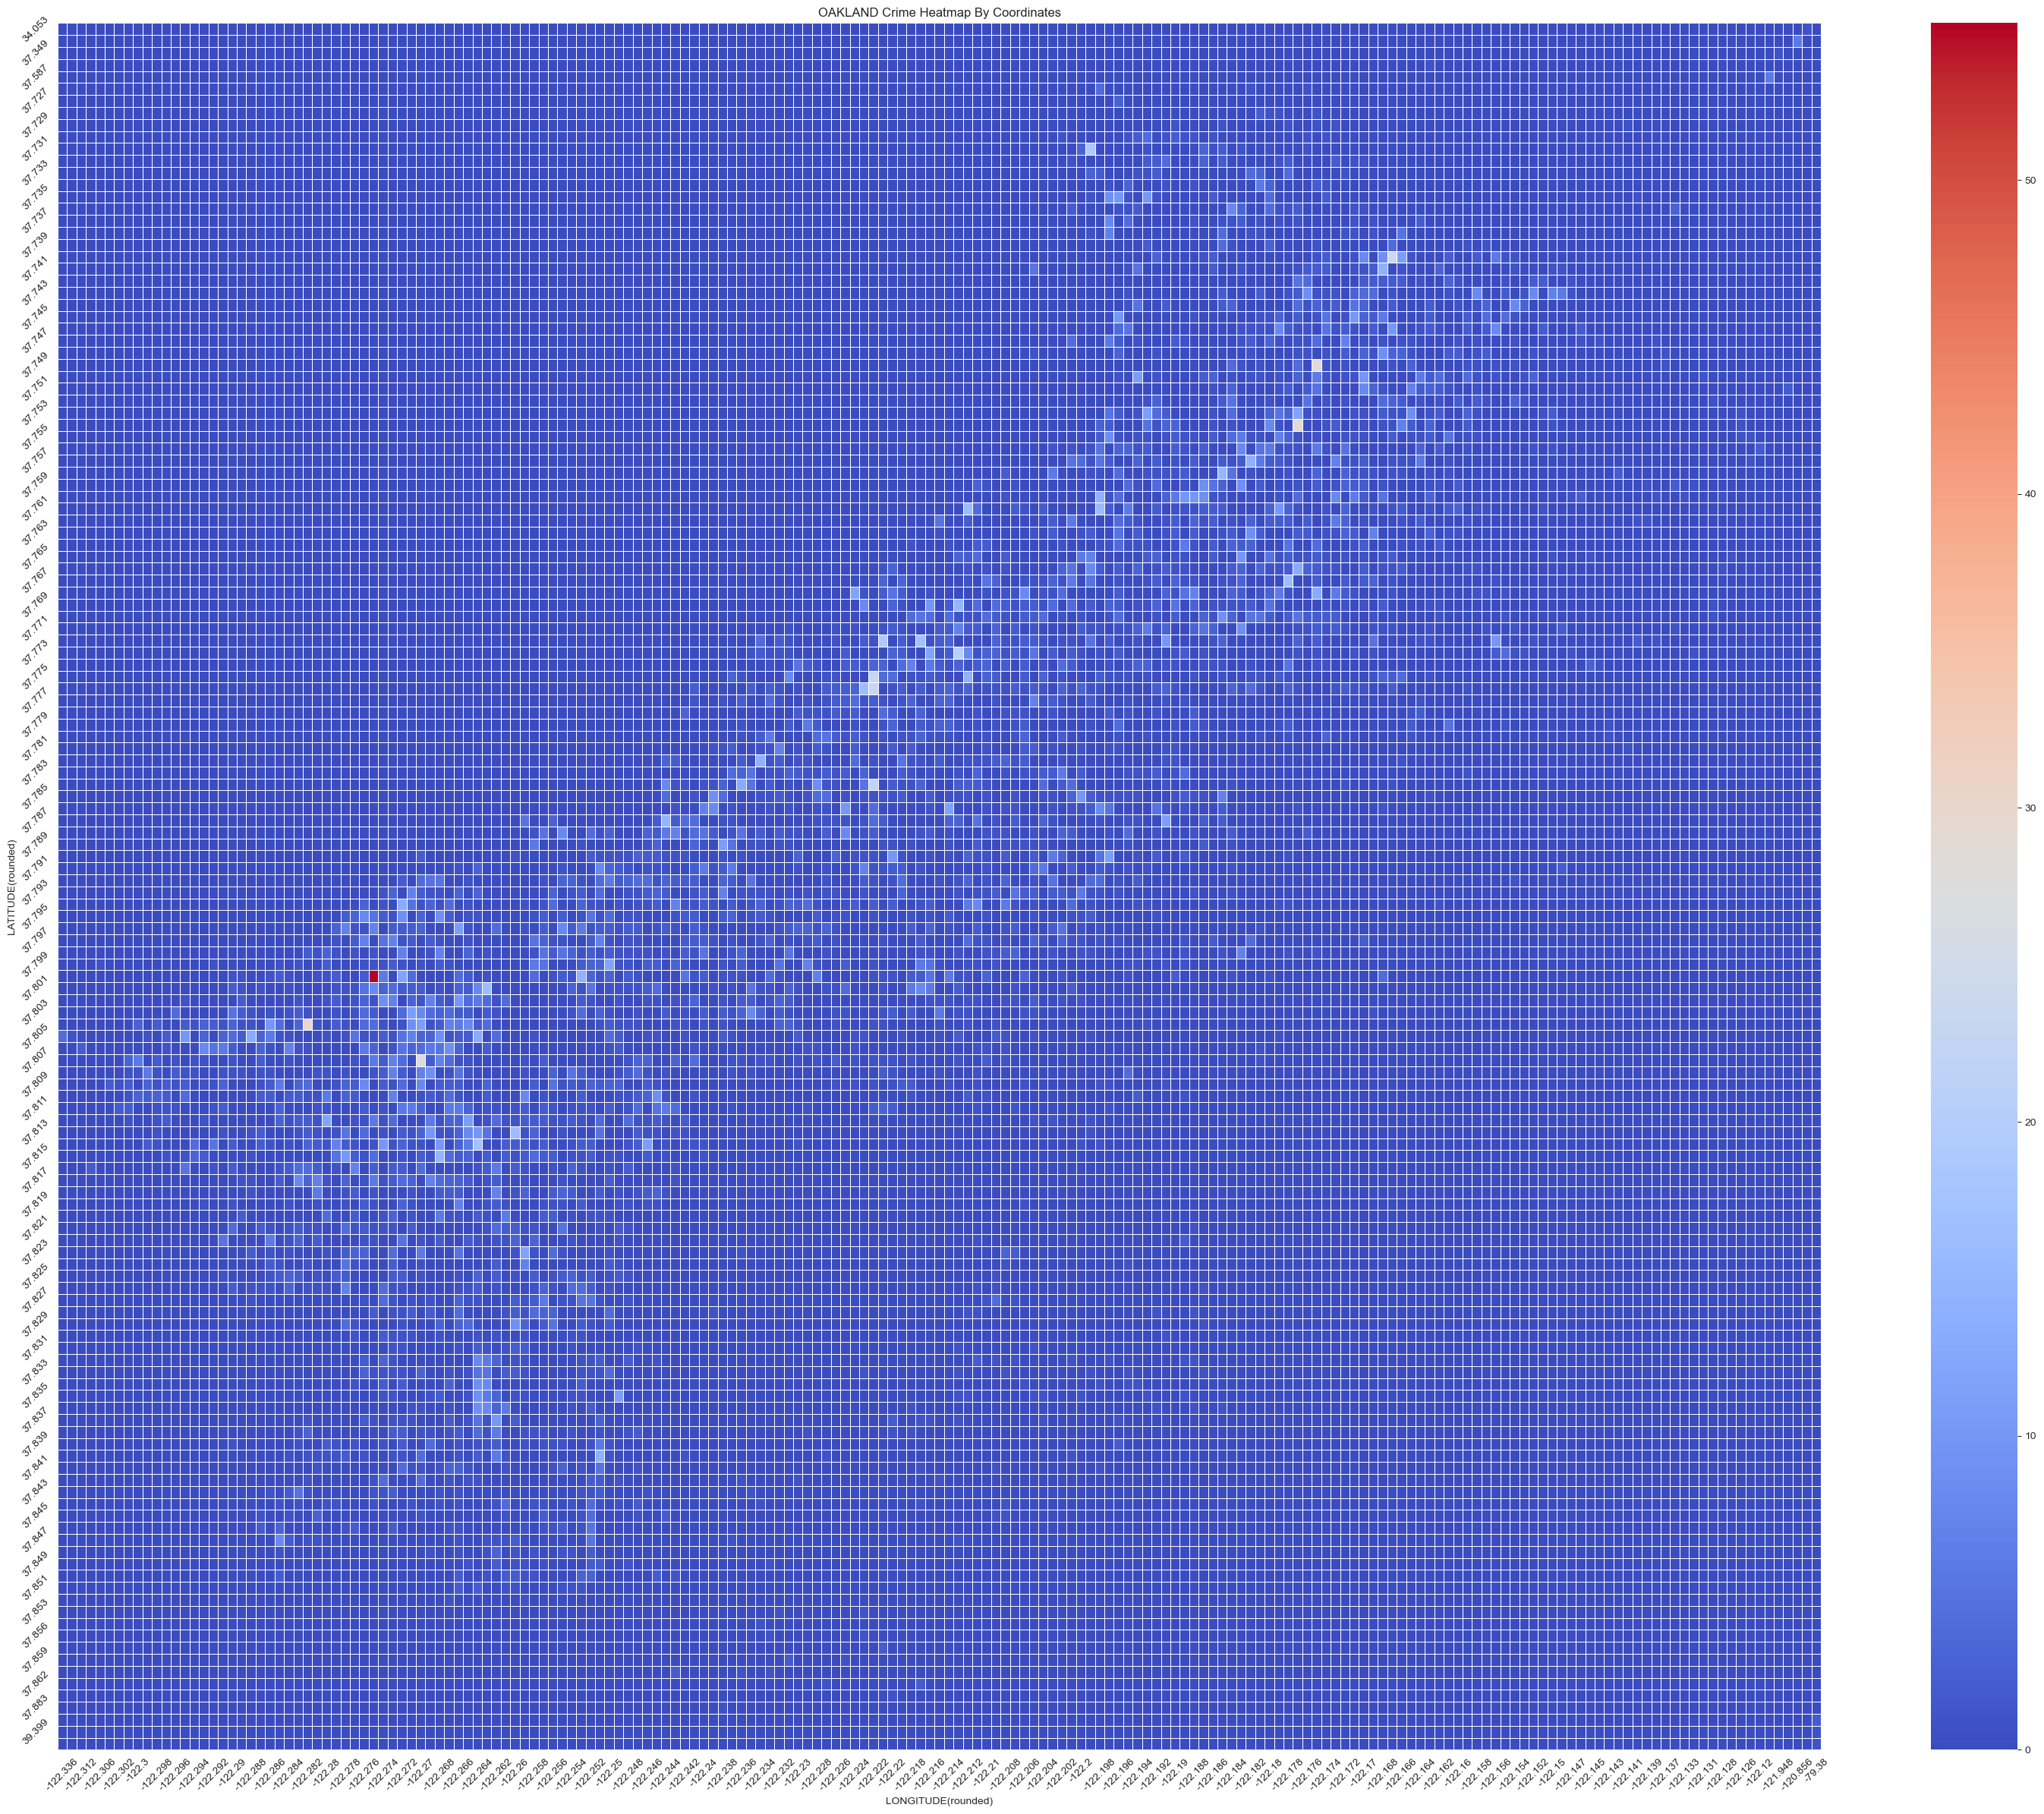

In [233]:
# creating the seaborn heatmap
oakheatmap = df.groupby(['LAT_ROUND','LON_ROUND']).size().unstack(fill_value=0)
plt.figure(figsize=(30,24))
# plotting with colors for better visualization.
sns.heatmap(oakheatmap, cmap='coolwarm', linewidths=0.5, linecolor='white')
# adding titles for readability
plt.title('OAKLAND Crime Heatmap By Coordinates')
plt.xlabel("LONGITUDE(rounded)")
plt.ylabel("LATITUDE(rounded)")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

In [234]:
# shape of the dataframe to adjust the size as needed
print("Heatmap shape:", oakheatmap.shape)

Heatmap shape: (144, 187)


In [237]:
oakland_map = [37.8044, -122.2712]
map = folium.Map(location=oakland_map, zoom_start=12)
heat_data = [[row['LAT'], row['LON']] for index, row in df.iterrows()]
HeatMap(heat_data, radius=8, blur=5, min_opacity=0.2).add_to(map)

In [ ]:
%%sql


In [236]:
map